# **DIL700 - Digest Climatic Data from Trollhättan**

---

### Importing libraries

In [3]:
!pip install tensorflow
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# import libraries

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from scipy.stats import norm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, SimpleRNN
from sklearn.preprocessing import MinMaxScaler, MultiLabelBinarizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [5]:
import seaborn as sns
sns.set(style='white')

In [6]:
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('default')

%matplotlib inline
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (15, 15)

In [7]:
# disable warnings

import warnings
warnings.filterwarnings('ignore')

### Load dataset

In [8]:
# mounting to google drive folder

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# loading the dataset

climate_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DeepLearning/Datasets/Dataset.csv')

In [10]:
climate_df.head(4).T

,0,1,2,3
Comm. Timestamp,14-03-2023 00:39,14-03-2023 00:49,14-03-2023 00:59,14-03-2023 01:09
FCnt,2676,2677,2678,2679
SpFact,8,8,8,8
RSSI,-116,-112,-107,-111
SNR,-3.0,4.0,9.0,-8.0
Gateway,1105,1105,1105,1105
Payload (Hex),0100350253070e1a0e127014000ed8e8,0100330253070e1a0e127b14000ed96b,0100300253070e180e128914000ed9a1,01002e0253070e1a0e138814000eda47
AccMotion,NaN,NaN,NaN,NaN
AccX,NaN,NaN,NaN,NaN
AccY,NaN,NaN,NaN,NaN


In [11]:
climate_df.tail(4).T

,23996,23997,23998,23999
Comm. Timestamp,21-03-2023 09:44,21-03-2023 09:54,21-03-2023 10:04,21-03-2023 10:14
FCnt,3468,3469,3470,3471
SpFact,7,7,7,7
RSSI,-114,-110,-111,-113
SNR,-2.0,-5.0,-3.0,2.0
Gateway,1105,1105,1105,1105
Payload (Hex),01000f025a070e180c000014000f654a,010011025a070e1b0c000014000f65bf,010013025a070e1b0c000014000f6527,010015025a070e1b0c000014000f655a
AccMotion,NaN,NaN,NaN,NaN
AccX,NaN,NaN,NaN,NaN
AccY,NaN,NaN,NaN,NaN


In [12]:
climate_df.shape

(24000, 33)

In [13]:
climate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Comm. Timestamp   24000 non-null  object 
 1   FCnt              24000 non-null  int64  
 2   SpFact            24000 non-null  int64  
 3   RSSI              24000 non-null  int64  
 4   SNR               24000 non-null  float64
 5   Gateway           24000 non-null  int64  
 6   Payload (Hex)     24000 non-null  object 
 7   AccMotion         0 non-null      float64
 8   AccX              0 non-null      float64
 9   AccY              0 non-null      float64
 10  AccZ              0 non-null      float64
 11  Analog1           0 non-null      float64
 12  Co2               0 non-null      float64
 13  ExternalDigital   0 non-null      float64
 14  ExternalDistance  5999 non-null   float64
 15  ExternalTemp1     9999 non-null   float64
 16  Humidity          23997 non-null  float6

### Exploring data

In [14]:
# check null values

climate_df.isnull()

,Comm. Timestamp,FCnt,SpFact,RSSI,SNR,Gateway,Payload (Hex),AccMotion,AccX,AccY,...,Occupancy,Pressure,Pulse1,Pulse1Abs,SoundAvg,SoundPeak,Temperature,Vdd,Waterleak,Events
0,False,False,False,False,False,False,False,True,True,True,...,True,False,True,True,True,True,False,False,True,True
1,False,False,False,False,False,False,False,True,True,True,...,True,False,True,True,True,True,False,False,True,True
2,False,False,False,False,False,False,False,True,True,True,...,True,False,True,True,True,True,False,False,True,True
3,False,False,False,False,False,False,False,True,True,True,...,True,False,True,True,True,True,False,False,True,True
4,False,False,False,False,False,False,False,True,True,True,...,True,False,True,True,True,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,False,False,False,False,False,False,False,True,True,True,...,True,False,True,True,True,True,False,False,True,True
23996,False,False,False,False,False,False,False,True,True,True,...,True,False,True,True,True,True,False,False,True,True
23997,False,False,False,False,False,False,False,True,True,True,...,True,False,True,True,True,True,False,False,True,True
23998,False,False,False,False,False,False,False,True,True,True,...,True,False,True,True,True,True,False,False,True,True


In [15]:
# check number of null values in each field

climate_df.isnull().sum()

Comm. Timestamp         0
FCnt                    0
SpFact                  0
RSSI                    0
SNR                     0
Gateway                 0
Payload (Hex)           0
AccMotion           24000
AccX                24000
AccY                24000
AccZ                24000
Analog1             24000
Co2                 24000
ExternalDigital     24000
ExternalDistance    18001
ExternalTemp1       14001
Humidity                3
IrExternalTemp      24000
IrInternalTemp      24000
Latitude            24000
Light               24000
Longitude           24000
Motion              24000
Occupancy           24000
Pressure                2
Pulse1              24000
Pulse1Abs           24000
SoundAvg            24000
SoundPeak           24000
Temperature             3
Vdd                     2
Waterleak           24000
Events              24000
dtype: int64

Only **Humidity**, **Pressure**, **Temperature** and **ExternalDistance** are useful in our case. So drop all other fields from the dataframe.

In [16]:
# select the columns needed

columns_to_keep = ['Humidity', 'Pressure', 'Temperature', 'ExternalDistance']
climate_df = climate_df[columns_to_keep]

In [17]:
climate_df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Humidity,83.000,83.000,83.000,83.000,83.000,83.000,83.000,83.000,83.000,83.000
Pressure,973.032,973.163,973.217,973.383,973.807,973.839,973.974,974.079,974.135,974.319
Temperature,5.300,5.100,4.800,4.600,4.400,4.200,4.100,3.900,3.800,3.700
ExternalDistance,4720.000,4731.000,4745.000,5000.000,4875.000,5000.000,4740.000,4725.000,4732.000,4711.000


In [18]:
climate_df.tail(10).T

,23990,23991,23992,23993,23994,23995,23996,23997,23998,23999
Humidity,90.000,91.000,90.000,90.000,90.000,90.000,90.00,90.000,90.000,90.000
Pressure,1009.079,1009.195,1009.288,1009.131,1009.141,1009.054,1008.97,1009.087,1008.935,1008.986
Temperature,0.100,0.300,0.700,0.900,1.100,1.300,1.50,1.700,1.900,2.100
ExternalDistance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
climate_df.shape

(24000, 4)

In [20]:
climate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Humidity          23997 non-null  float64
 1   Pressure          23998 non-null  float64
 2   Temperature       23997 non-null  float64
 3   ExternalDistance  5999 non-null   float64
dtypes: float64(4)
memory usage: 750.1 KB


### Split dataset

In [21]:
train_set, test_set = train_test_split(climate_df, test_size=0.2, random_state=42)

In [22]:
train_set.head(4).T

,3572,16782,20543,12368
Humidity,83.000,28.000,82.000,66.000
Pressure,1006.335,1009.793,1005.706,1016.655
Temperature,5.500,20.400,4.400,3.100
ExternalDistance,4797.000,NaN,NaN,NaN


In [23]:
train_set.shape

(19200, 4)

In [24]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19200 entries, 3572 to 23654
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Humidity          19198 non-null  float64
 1   Pressure          19198 non-null  float64
 2   Temperature       19198 non-null  float64
 3   ExternalDistance  4789 non-null   float64
dtypes: float64(4)
memory usage: 750.0 KB


In [25]:
test_set.head(4).T

,3111,18679,17472,21451
Humidity,85.000,76.000,65.000,86.000
Pressure,993.322,1014.057,1003.878,1007.434
Temperature,-4.200,5.000,5.500,2.900
ExternalDistance,4778.000,NaN,NaN,NaN


In [26]:
test_set.shape

(4800, 4)

In [27]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 3111 to 13061
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Humidity          4799 non-null   float64
 1   Pressure          4800 non-null   float64
 2   Temperature       4799 non-null   float64
 3   ExternalDistance  1210 non-null   float64
dtypes: float64(4)
memory usage: 187.5 KB


### Algorithms to detect ***Missing data***, ***Bad quality data***, ***Anomalies***

Algorithms to detect missing data

In [28]:
# detects missing values in the given dataset

def detect_missing_data(dataset):
    missing_cols = dataset.columns[dataset.isna().any()].tolist()
    return missing_cols

In [29]:
missing_cols_train = detect_missing_data(train_set)

if missing_cols_train:
    print("Missing data found in columns in TRAIN SET:", missing_cols_train)
else:
    print("No missing data found in TRAIN SET")

Missing data found in columns in TRAIN SET: ['Humidity', 'Pressure', 'Temperature', 'ExternalDistance']


In [30]:
missing_cols_test = detect_missing_data(test_set)

if missing_cols_test:
    print("Missing data found in columns in TEST SET:", missing_cols_test)
else:
    print("No missing data found in TEST SET")

Missing data found in columns in TEST SET: ['Humidity', 'Temperature', 'ExternalDistance']


Algorithms to detect bad quality data

In [31]:
# detect bad quality data using IQR method

def detect_bad_quality_iqr(dataset, set_type, threshold=1.5):
    q1 = dataset.quantile(0.25)
    q3 = dataset.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    bad_quality = ((dataset < lower_bound) | (dataset > upper_bound)).any(axis=1)
    if bad_quality.any():
        print(f"Bad quality data detected in {set_type}")
        print(dataset[bad_quality])
    else:
        print(f"No bad quality data detected in {set_type}")

In [32]:
detect_bad_quality_iqr(train_set, 'TRAIN SET')

Bad quality data detected in TRAIN SET
       Humidity  Pressure  Temperature  ExternalDistance
16782      28.0  1009.793         20.4               NaN
5749       84.0  1004.997          8.4            4521.0
16313      23.0  1010.334         20.6               NaN
16501      25.0  1015.812         20.4               NaN
16868      28.0  1013.694         20.6               NaN
...         ...       ...          ...               ...
5311       76.0  1011.154          6.8            4383.0
16023      19.0  1011.712         20.7               NaN
16850      28.0  1012.611         20.6               NaN
11284      73.0  1013.606         -7.9               NaN
5390       74.0  1003.498          2.4            4421.0

[4339 rows x 4 columns]


In [33]:
detect_bad_quality_iqr(test_set, 'TEST SET')

Bad quality data detected in TEST SET
       Humidity  Pressure  Temperature  ExternalDistance
1056       80.0   988.198          2.4            4829.0
9061       82.0   977.317          3.0               NaN
16110      21.0  1009.393         21.0               NaN
13088      75.0   987.881          1.4               NaN
1052       80.0   987.159          3.3            4829.0
...         ...       ...          ...               ...
5068       82.0   984.619         -2.2            4369.0
10353      82.0   996.821         -5.3               NaN
20252      82.0  1014.729         -5.4               NaN
3263       82.0  1014.870         -6.3            4732.0
13061      76.0   981.921          4.5               NaN

[1081 rows x 4 columns]


Algorithms to detect anomalies

In [34]:
# detect anomalies using z-score method

def detect_anomalies_zscore(dataset, set_type, threshold=3):
    zscores = np.abs((dataset - dataset.mean()) / dataset.std())
    anomalies = (zscores > threshold).any(axis=1)
    if anomalies.any():
        print(f"Anomalies detected in {set_type}")
        print(dataset[anomalies])
    else:
        print(f"No anomalies detected in {set_type}")

In [35]:
detect_anomalies_zscore(train_set, 'TRAIN SET')

Anomalies detected in TRAIN SET
       Humidity  Pressure  Temperature  ExternalDistance
16782      28.0  1009.793         20.4               NaN
16313      23.0  1010.334         20.6               NaN
16501      25.0  1015.812         20.4               NaN
16868      28.0  1013.694         20.6               NaN
16236      22.0  1008.776         20.4               NaN
...         ...       ...          ...               ...
21518      86.0    -0.001          4.1               NaN
16216      22.0  1008.861         20.5               NaN
16448      24.0  1015.382         20.5               NaN
16023      19.0  1011.712         20.7               NaN
16850      28.0  1012.611         20.6               NaN

[821 rows x 4 columns]


In [36]:
detect_anomalies_zscore(test_set, 'TEST SET')

Anomalies detected in TEST SET
       Humidity  Pressure  Temperature  ExternalDistance
16110      21.0  1009.393         21.0               NaN
16465      25.0  1015.755         20.5               NaN
16400      24.0  1014.095         20.6               NaN
16536      25.0  1016.690         20.4               NaN
16247      22.0  1008.945         20.5               NaN
...         ...       ...          ...               ...
6051       77.0   974.914          2.1               NaN
16037      19.0  1011.045         20.6               NaN
16267      22.0  1009.648         20.5               NaN
16368      24.0  1012.557         20.6               NaN
16205      22.0  1008.963         20.5               NaN

[293 rows x 4 columns]


### Update null values with mean

In [37]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
train_set = pd.DataFrame(imputer.fit_transform(train_set), columns=train_set.columns).round(3)
test_set = pd.DataFrame(imputer.fit_transform(test_set), columns=test_set.columns).round(3)

In [38]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19200 entries, 0 to 19199
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Humidity          19200 non-null  float64
 1   Pressure          19200 non-null  float64
 2   Temperature       19200 non-null  float64
 3   ExternalDistance  19200 non-null  float64
dtypes: float64(4)
memory usage: 600.1 KB


In [39]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Humidity          4800 non-null   float64
 1   Pressure          4800 non-null   float64
 2   Temperature       4800 non-null   float64
 3   ExternalDistance  4800 non-null   float64
dtypes: float64(4)
memory usage: 150.1 KB


### Extract data into matrices

In [40]:
train_data = train_set.values
test_data = test_set.values

In [41]:
# create matrices for each column

humidity_train = train_data[:, 0].reshape(-1, 1)
pressure_train = train_data[:, 1].reshape(-1, 1)
temperature_train = train_data[:, 2].reshape(-1, 1)
external_distance_train = train_data[:, 3].reshape(-1, 1)

humidity_test = test_data[:, 0].reshape(-1, 1)
pressure_test = test_data[:, 1].reshape(-1, 1)
temperature_test = test_data[:, 2].reshape(-1, 1)
external_distance_test = test_data[:, 3].reshape(-1, 1)

In [42]:
humidity_train

array([[83.],
       [28.],
       [82.],
       ...,
       [85.],
       [71.],
       [89.]])

In [43]:
humidity_test

array([[85.],
       [76.],
       [65.],
       ...,
       [82.],
       [82.],
       [76.]])

### Plot data

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

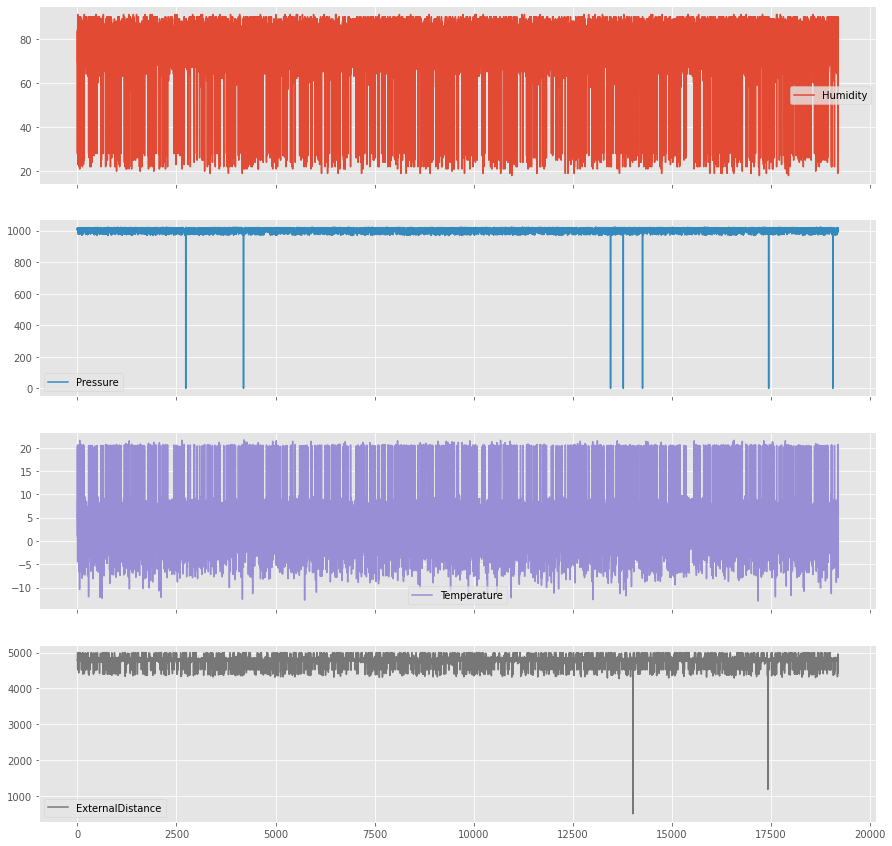

In [44]:
train_set.plot(subplots=True)

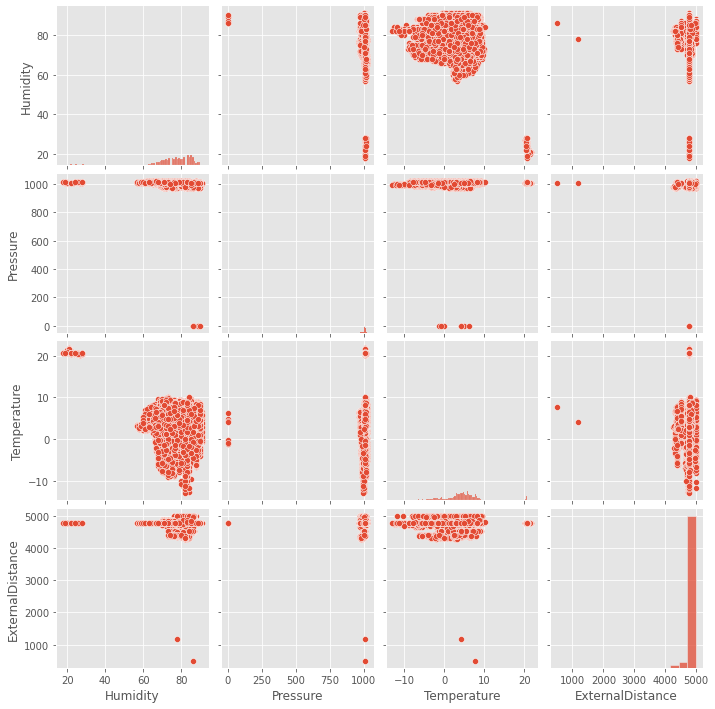

In [45]:
sns.pairplot(train_set)

### Cluster data and observe for interesting clusters

In [46]:
# create a KMeans object with 3 clusters
kmeans = KMeans(n_clusters=3)

# fit the KMeans object to the data matrices
kmeans.fit(external_distance_train)
kmeans.fit(humidity_train)
kmeans.fit(pressure_train)
kmeans.fit(temperature_train)

# get the labels assigned to each data point
external_distance_labels = kmeans.labels_
humidity_labels = kmeans.labels_
pressure_labels = kmeans.labels_
temperature_labels = kmeans.labels_

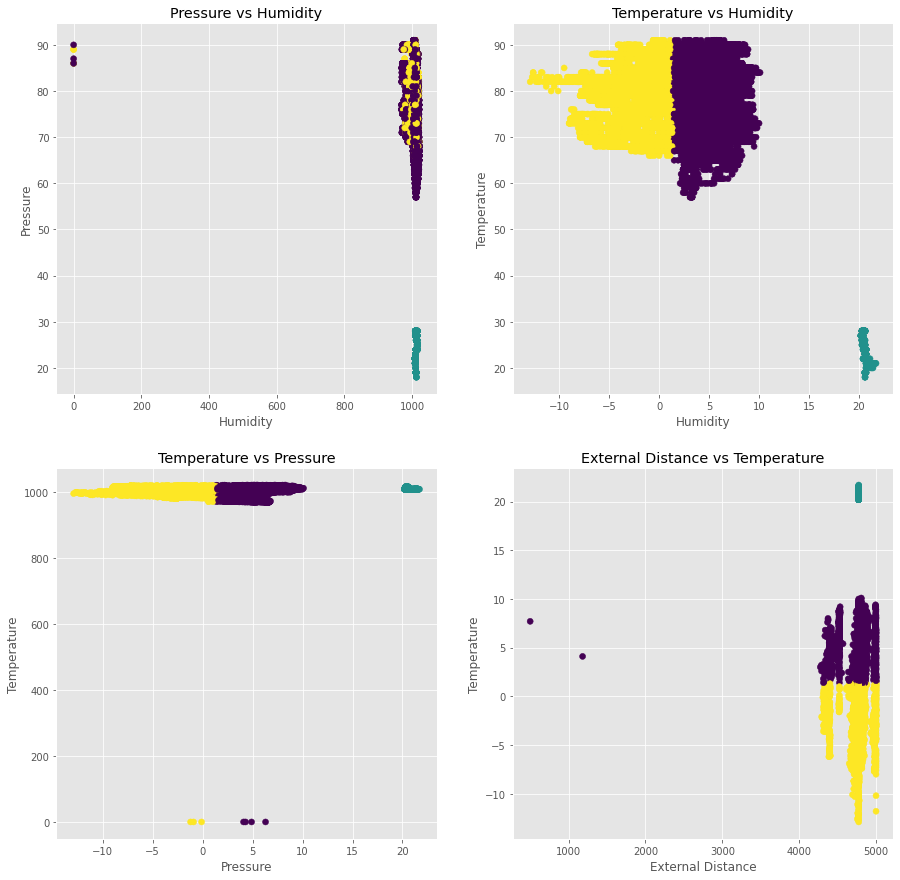

In [47]:
# plot the pressure vs humidity
plt.subplot(2, 2, 1)
plt.scatter(pressure_train, humidity_train, c=pressure_labels)
plt.ylabel("Pressure")
plt.xlabel("Humidity")
plt.title("Pressure vs Humidity")

# plot the temperature vs humidity
plt.subplot(2, 2, 2)
plt.scatter(temperature_train, humidity_train, c=temperature_labels)
plt.ylabel("Temperature")
plt.xlabel("Humidity")
plt.title("Temperature vs Humidity")

# plot the temperature vs pressure
plt.subplot(2, 2, 3)
plt.scatter(temperature_train, pressure_train, c=temperature_labels)
plt.ylabel("Temperature")
plt.xlabel("Pressure")
plt.title("Temperature vs Pressure")

# plot the external distance vs temperature
plt.subplot(2, 2, 4)
plt.scatter(external_distance_train, temperature_train, c=external_distance_labels)
plt.xlabel("External Distance")
plt.ylabel("Temperature")
plt.title("External Distance vs Temperature")

plt.show()

### Statistical analysis to look at PDF

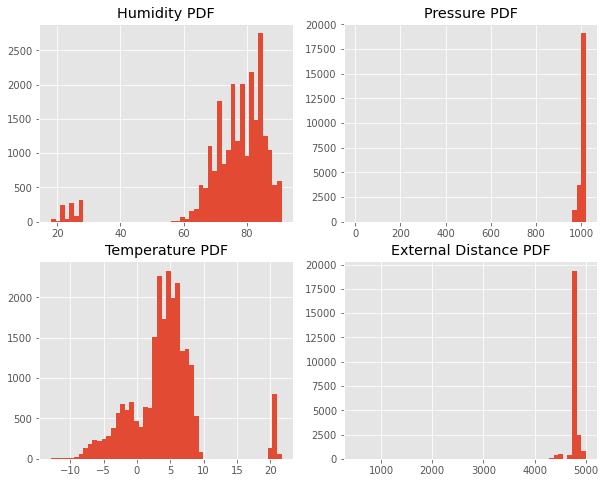

In [48]:
humidity = np.concatenate((humidity_train, humidity_test), axis=0)
pressure = np.concatenate((pressure_train, pressure_test), axis=0)
temperature = np.concatenate((temperature_train, temperature_test), axis=0)
external_distance = np.concatenate((external_distance_train, external_distance_test), axis=0)

# Plot the PDFs of the data columns
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.hist(humidity, bins=50)
plt.title('Humidity PDF')
plt.subplot(2,2,2)
plt.hist(pressure, bins=50)
plt.title('Pressure PDF')
plt.subplot(2,2,3)
plt.hist(temperature, bins=50)
plt.title('Temperature PDF')
plt.subplot(2,2,4)
plt.hist(external_distance, bins=50)
plt.title('External Distance PDF')
plt.show()

### Window data to see PDFs change with time

Temperature

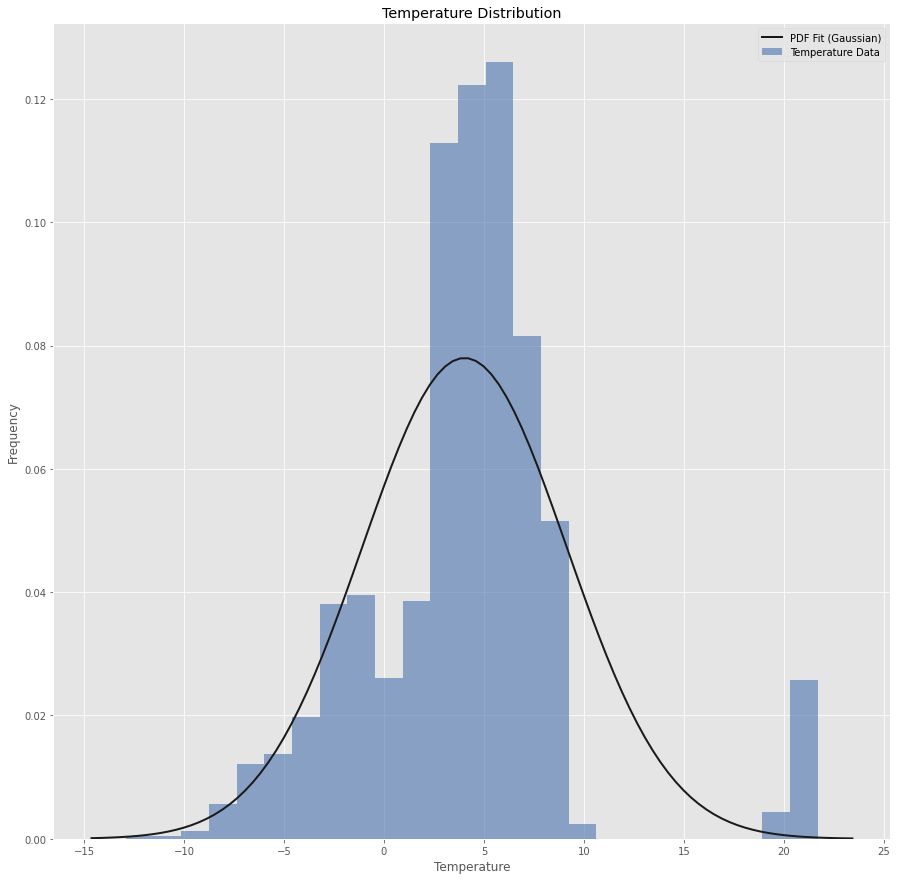

In [49]:
# fit a Gaussian distribution to the temperature data
mu, std = norm.fit(temperature_train)

# plot the histogram of the temperature data
plt.hist(temperature_train, bins=25, density=True, alpha=0.6, color='b')

# plot the PDF of the fitted Gaussian distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# add a legend to the plot
plt.legend(['PDF Fit (Gaussian)', 'Temperature Data'])

# add a title and axis labels to the plot
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# display the plot
plt.show()

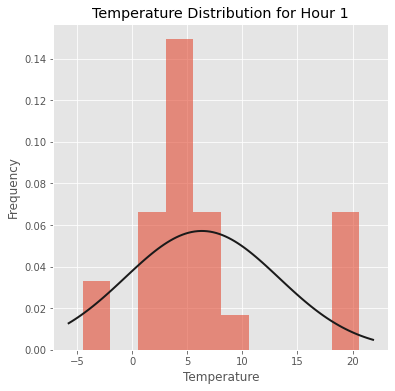

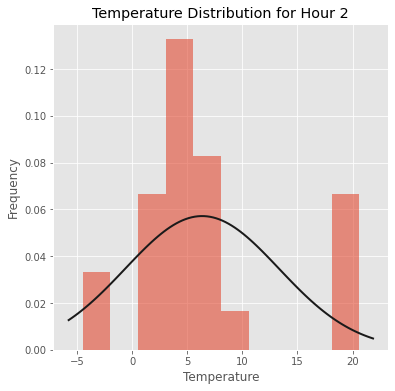

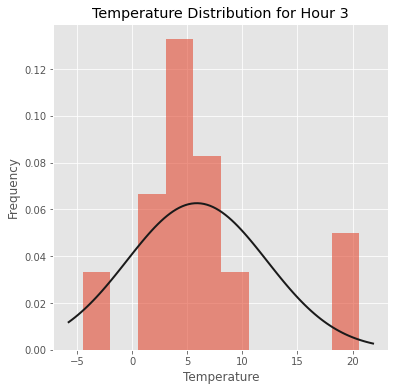

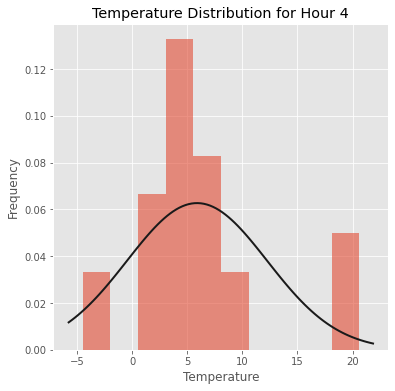

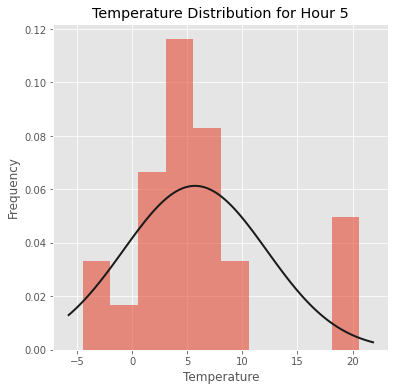

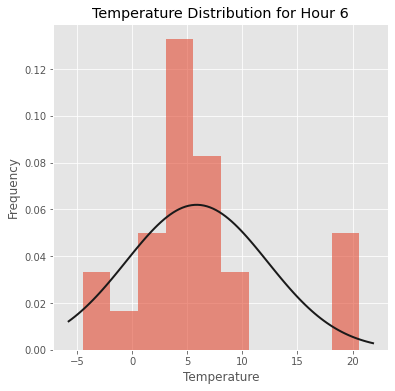

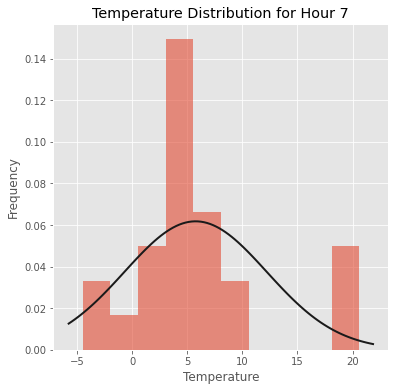

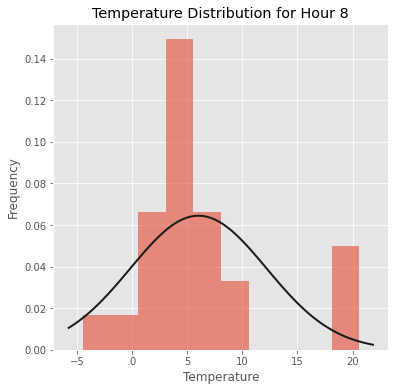

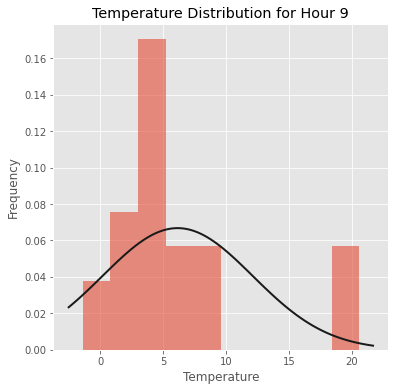

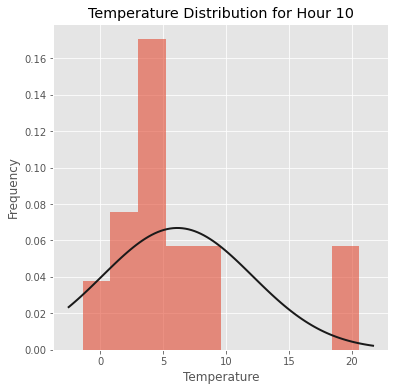

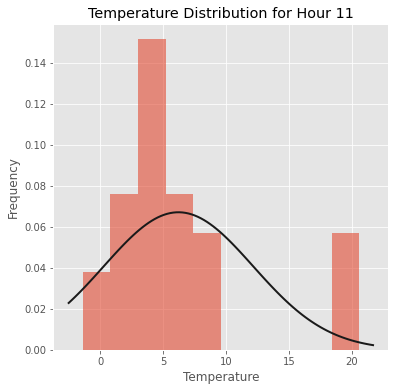

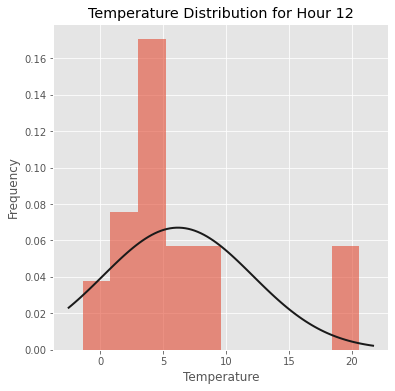

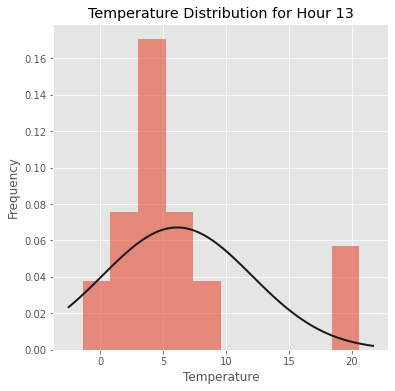

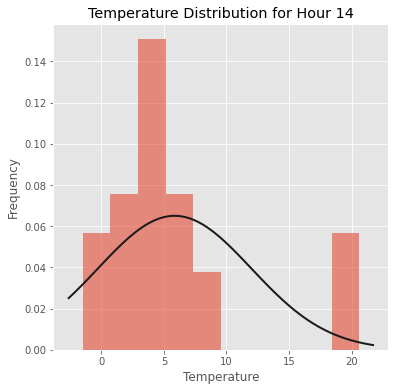

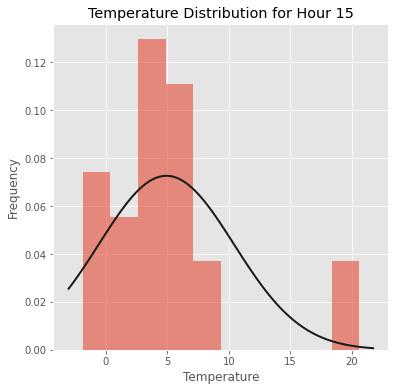

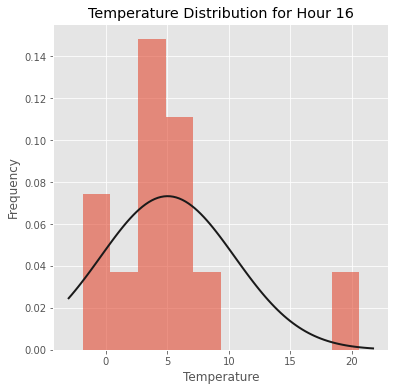

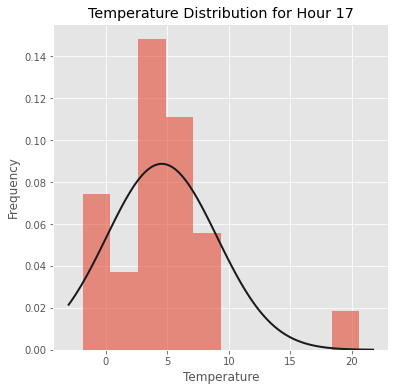

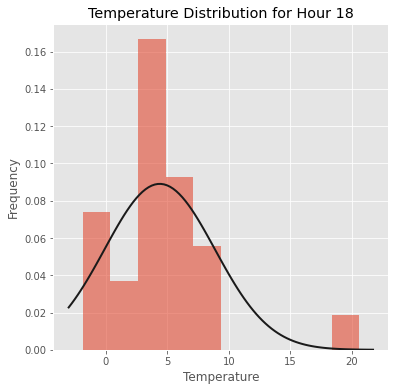

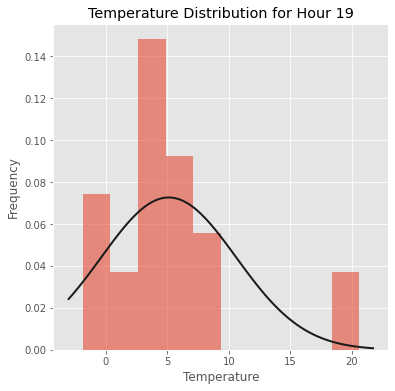

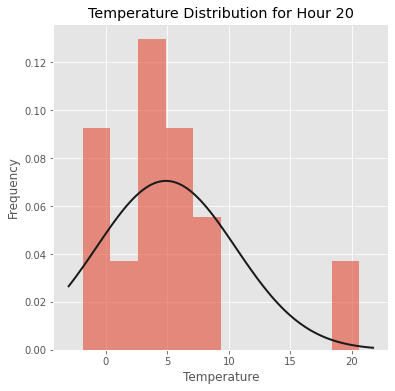

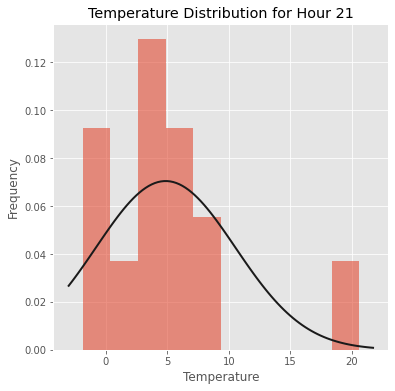

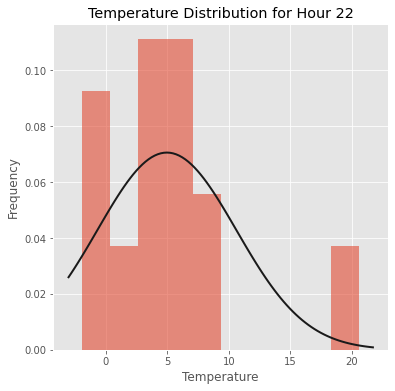

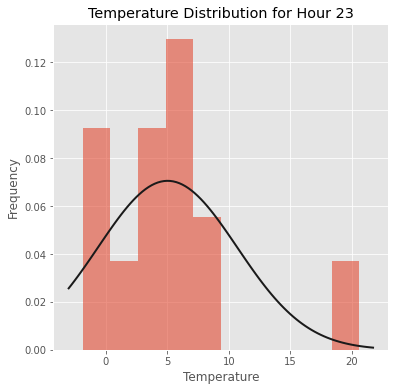

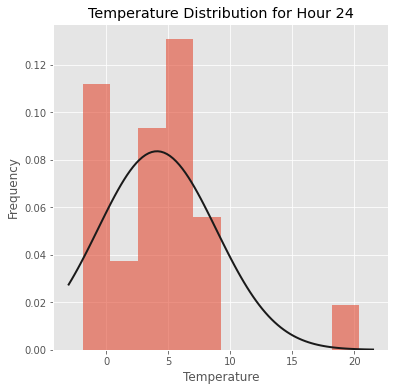

In [50]:
plt.rcParams['figure.figsize'] = (6, 6)

# plot the PDF of the temperature data for each hour of the day
for i in range(24):
    hour_data = temperature_train[i:i+24]
    mu, std = norm.fit(hour_data)
    plt.hist(hour_data, bins=10, density=True, alpha=0.6)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    plt.title(f'Temperature Distribution for Hour {i + 1}')
    plt.xlabel('Temperature')
    plt.ylabel('Frequency')
    plt.show()

plt.rcParams['figure.figsize'] = (15, 15)

Humidity

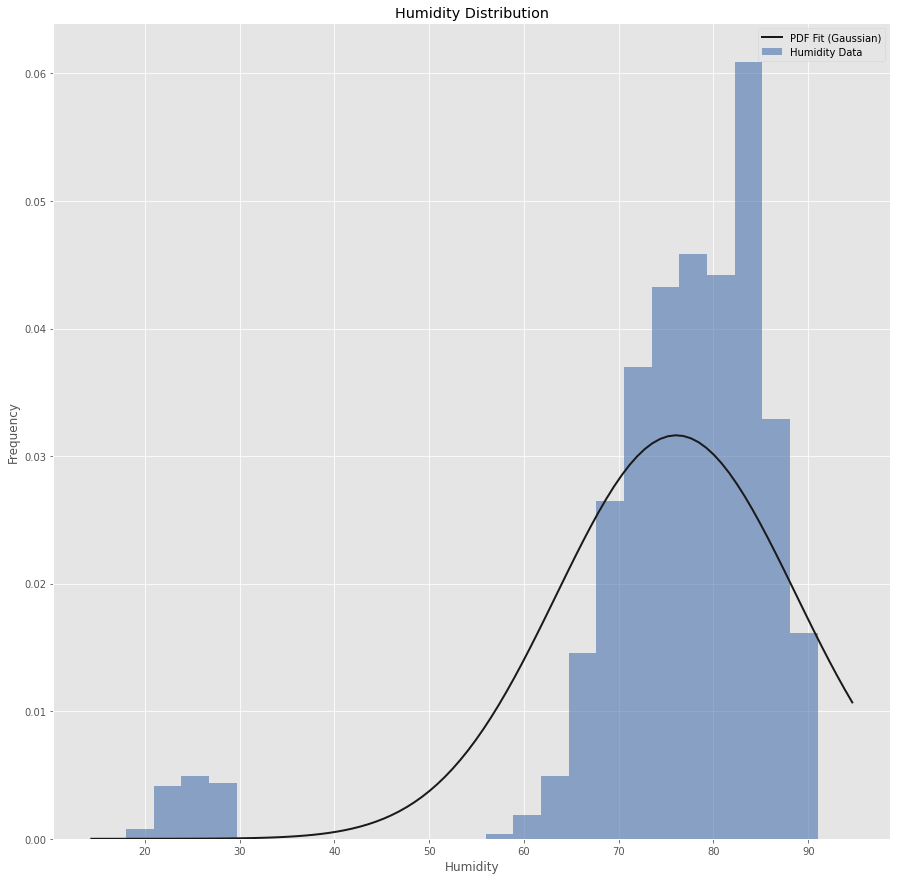

In [51]:
# fit a Gaussian distribution to the humidity data
mu, std = norm.fit(humidity_train)

# plot the histogram of the humidity data
plt.hist(humidity_train, bins=25, density=True, alpha=0.6, color='b')

# plot the PDF of the fitted Gaussian distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# add a legend to the plot
plt.legend(['PDF Fit (Gaussian)', 'Humidity Data'])

# add a title and axis labels to the plot
plt.title('Humidity Distribution')
plt.xlabel('Humidity')
plt.ylabel('Frequency')

# display the plot
plt.show()

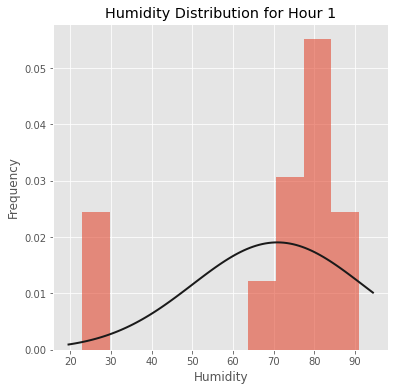

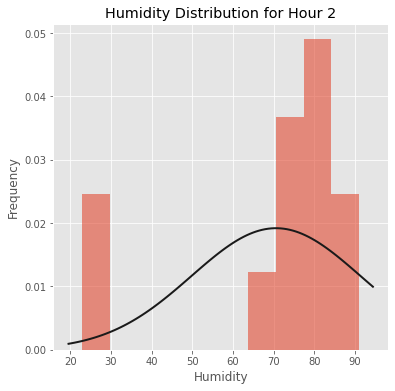

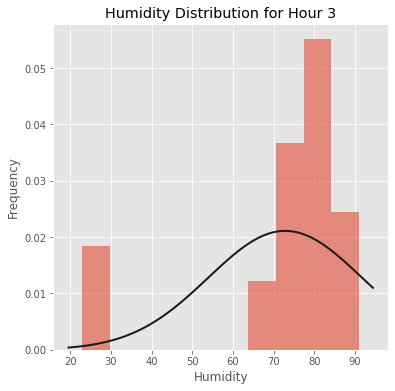

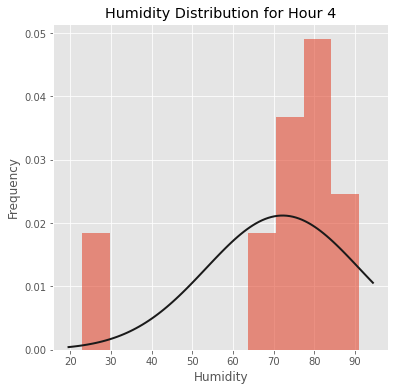

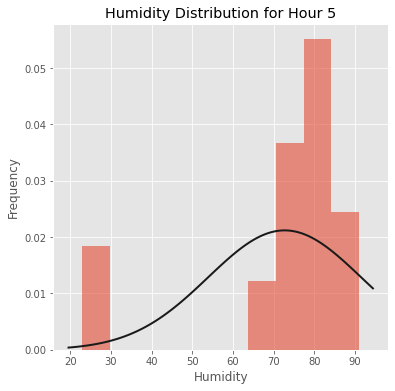

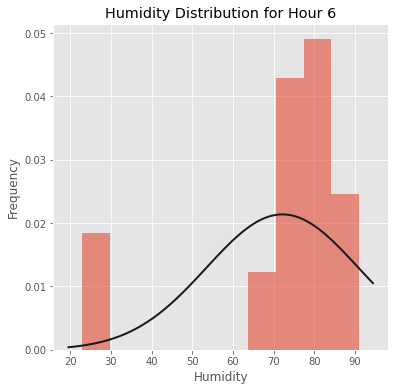

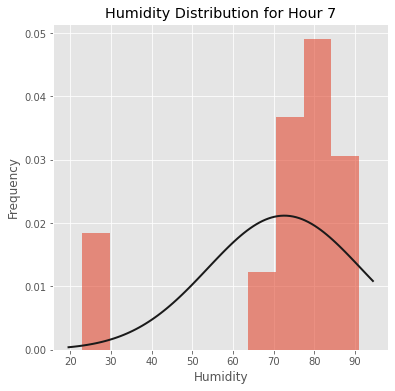

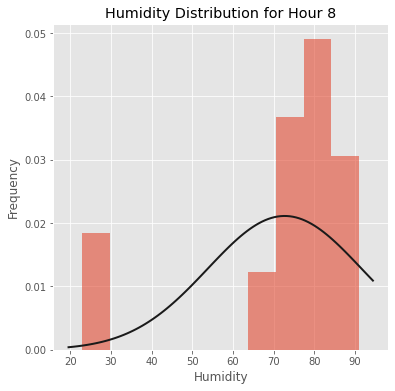

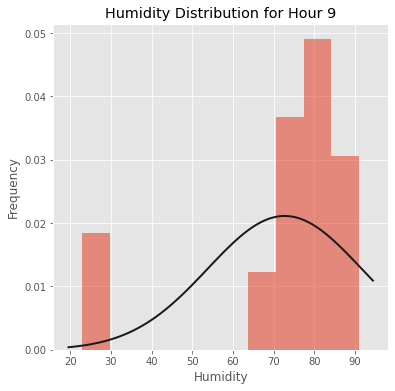

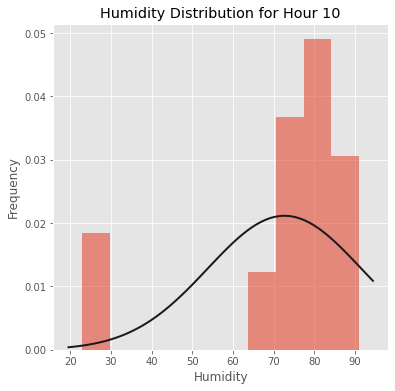

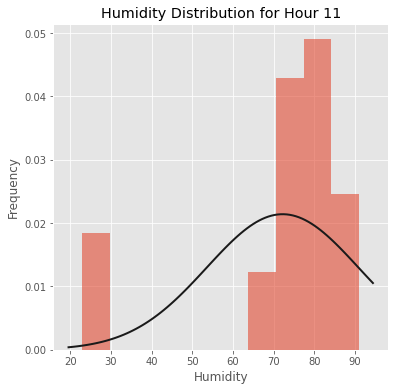

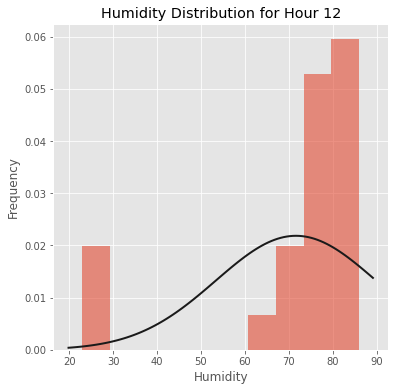

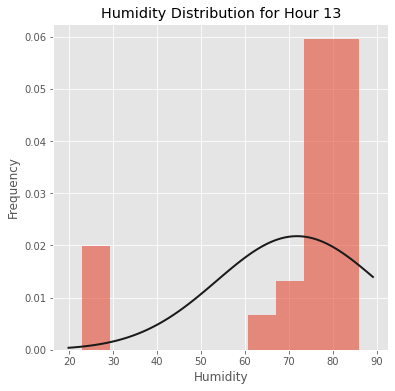

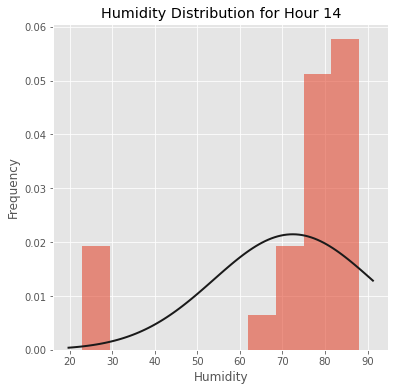

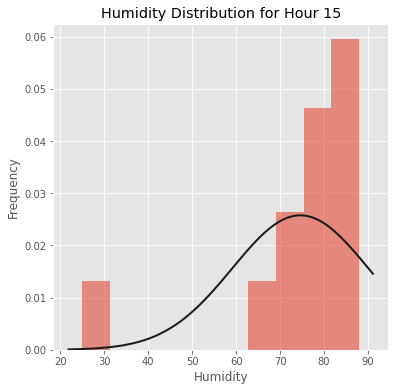

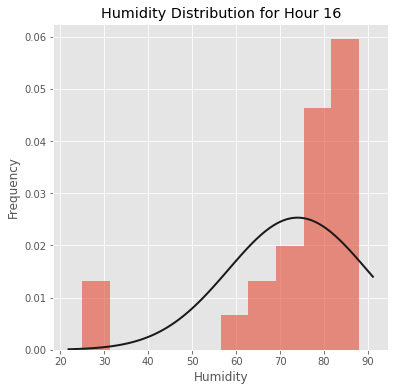

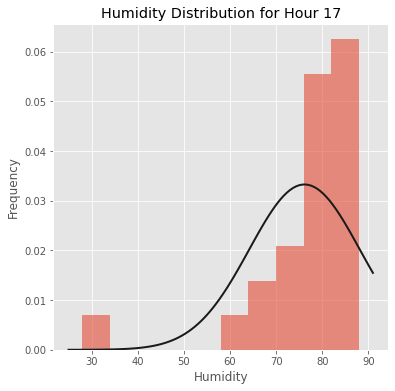

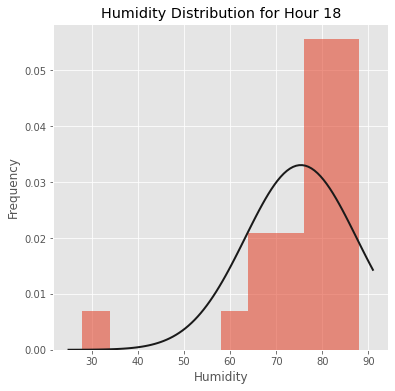

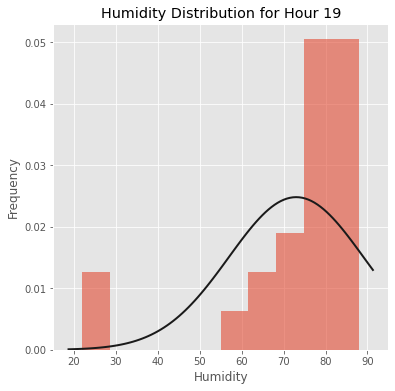

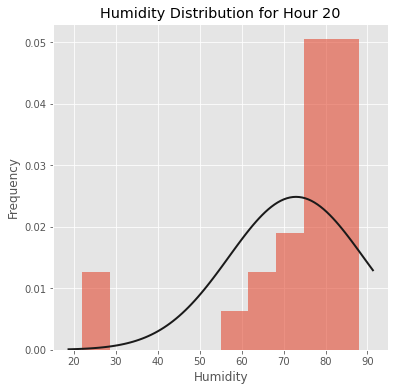

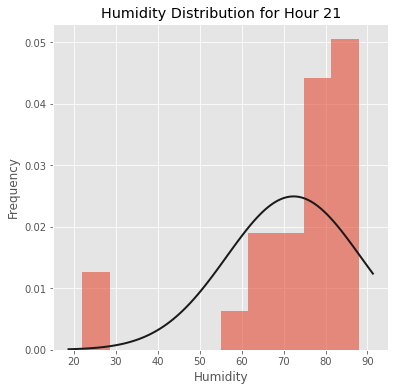

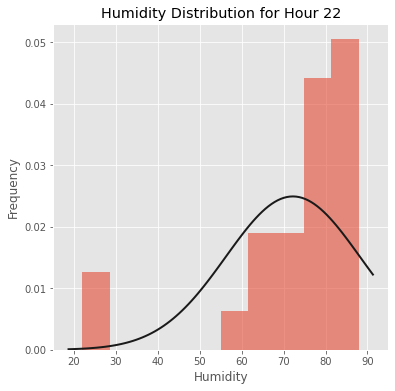

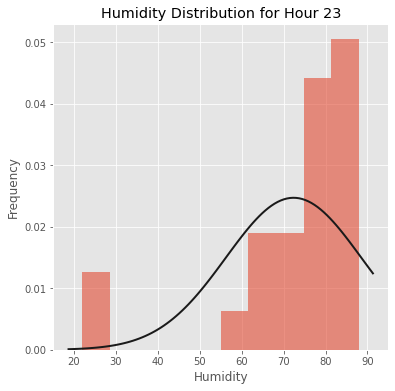

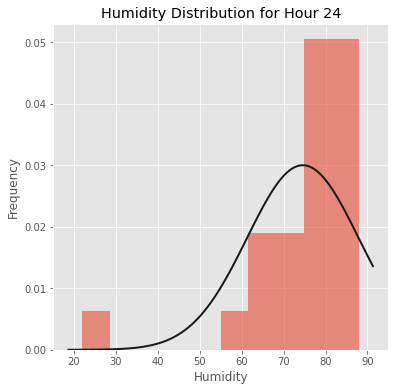

In [52]:
plt.rcParams['figure.figsize'] = (6, 6)

# plot the PDF of the humidity data for each hour of the day
for i in range(24):
    hour_data = humidity_train[i:i+24]
    mu, std = norm.fit(hour_data)
    plt.hist(hour_data, bins=10, density=True, alpha=0.6)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    plt.title(f'Humidity Distribution for Hour {i + 1}')
    plt.xlabel('Humidity')
    plt.ylabel('Frequency')
    plt.show()

plt.rcParams['figure.figsize'] = (15, 15)

### Predict future data

Using LSTM

In [53]:
# Concatenate the train and test matrices for each feature
X_train = np.concatenate((temperature_train, humidity_train, pressure_train, external_distance_train), axis=1)
X_test = np.concatenate((temperature_test, humidity_test, pressure_test, external_distance_test), axis=1)

# Scale the input matrices using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the window size and number of output features
window_size = 24
n_outputs = 4

# Create the input sequences and corresponding labels for training
X_train_sequences = []
y_train_sequences = []
for i in range(window_size, len(X_train_scaled)):
    X_train_sequences.append(X_train_scaled[i-window_size:i])
    y_train_sequences.append(X_train_scaled[i, :n_outputs])
X_train_sequences, y_train_sequences = np.array(X_train_sequences), np.array(y_train_sequences)

# Create the input sequences and corresponding labels for testing
X_test_sequences = []
y_test_sequences = []
for i in range(window_size, len(X_test_scaled)):
    X_test_sequences.append(X_test_scaled[i-window_size:i])
    y_test_sequences.append(X_test_scaled[i, :n_outputs])
X_test_sequences, y_test_sequences = np.array(X_test_sequences), np.array(y_test_sequences)

# Define the LSTM model architecture
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_sequences.shape[1], X_train_sequences.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=n_outputs))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_sequences, y_train_sequences, epochs=50, batch_size=32)

# Use the model to predict future values
y_pred_scaled = model.predict(X_test_sequences)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_pred = y_pred[:, :n_outputs]

Epoch 1/50
600/600 [==============================] - 16s 10ms/step - loss: 0.0285
Epoch 2/50
600/600 [==============================] - 5s 9ms/step - loss: 0.0183
Epoch 3/50
600/600 [==============================] - 6s 9ms/step - loss: 0.0166
Epoch 4/50
600/600 [==============================] - 6s 9ms/step - loss: 0.0156
Epoch 5/50
600/600 [==============================] - 5s 9ms/step - loss: 0.0149
Epoch 6/50
600/600 [==============================] - 7s 11ms/step - loss: 0.0144
Epoch 7/50
600/600 [==============================] - 5s 9ms/step - loss: 0.0141
Epoch 8/50
600/600 [==============================] - 8s 13ms/step - loss: 0.0138
Epoch 9/50
600/600 [==============================] - 5s 9ms/step - loss: 0.0136
Epoch 10/50
600/600 [==============================] - 6s 10ms/step - loss: 0.0135
Epoch 11/50
600/600 [==============================] - 5s 9ms/step - loss: 0.0134
Epoch 12/50
600/600 [==============================] - 6s 10ms/step - loss: 0.0133
Epoch 13/50
600/600

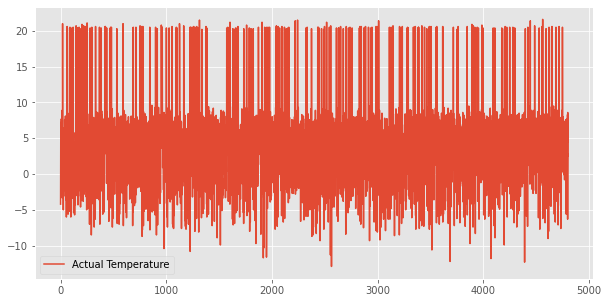

In [54]:
plt.figure(figsize=(10,5))
plt.plot(test_set.index, test_set['Temperature'], label='Actual Temperature')
plt.legend()
plt.show()

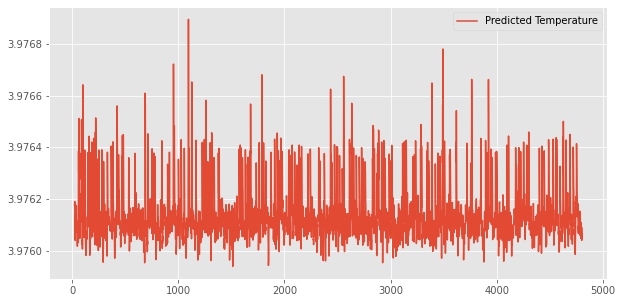

In [55]:
plt.figure(figsize=(10,5))
plt.plot(test_set.index[window_size:], y_pred[:, 0], label='Predicted Temperature')
plt.legend()
plt.show()

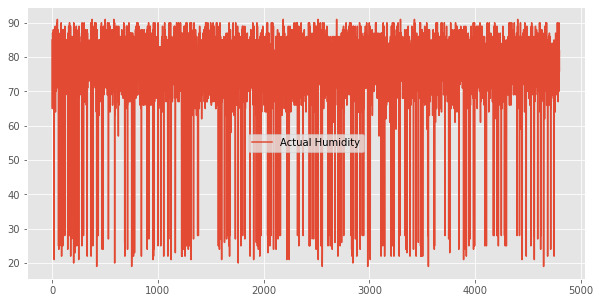

In [56]:
plt.figure(figsize=(10,5))
plt.plot(test_set.index, test_set['Humidity'], label='Actual Humidity')
plt.legend()
plt.show()

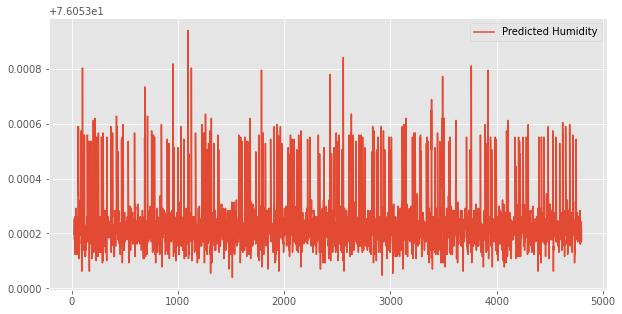

In [57]:
plt.figure(figsize=(10,5))
plt.plot(test_set.index[window_size:], y_pred[:, 1], label='Predicted Humidity')
plt.legend()
plt.show()

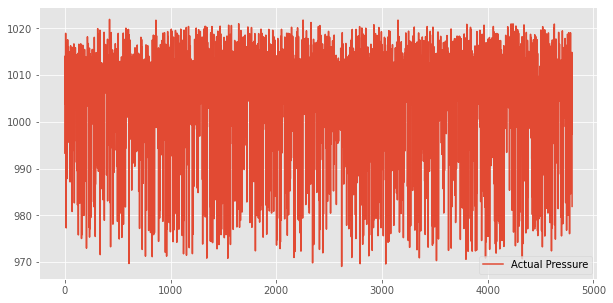

In [58]:
plt.figure(figsize=(10,5))
plt.plot(test_set.index, test_set['Pressure'], label='Actual Pressure')
plt.legend()
plt.show()

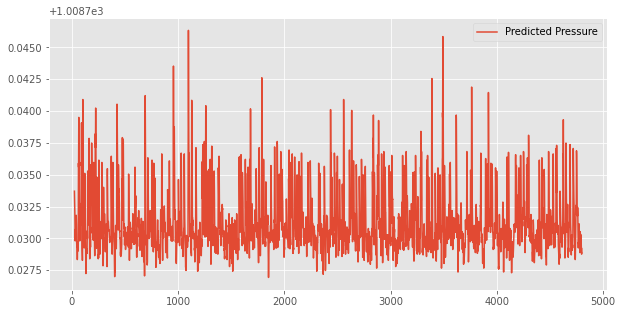

In [59]:
plt.figure(figsize=(10,5))
plt.plot(test_set.index[window_size:], y_pred[:, 2], label='Predicted Pressure')
plt.legend()
plt.show()

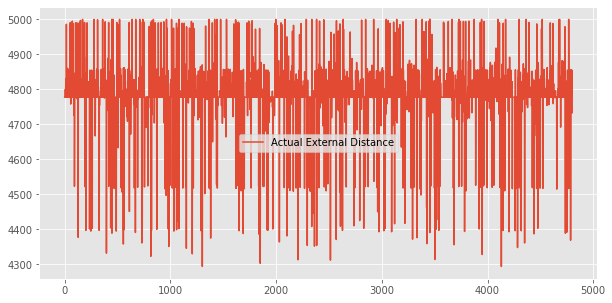

In [60]:
plt.figure(figsize=(10,5))
plt.plot(test_set.index, test_set['ExternalDistance'], label='Actual External Distance')
plt.legend()
plt.show()

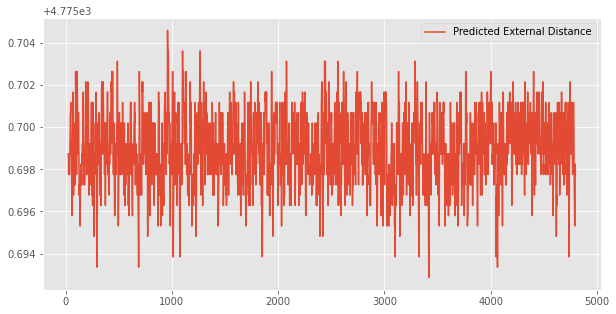

In [61]:
plt.figure(figsize=(10,5))
plt.plot(test_set.index[window_size:], y_pred[:, 3], label='Predicted External Distance')
plt.legend()
plt.show()

In [62]:
# Define the threshold value
threshold = 0.5

y_test_binary = np.zeros_like(y_test_sequences)
y_test_binary[y_test_sequences > threshold] = 1

# Convert the predicted values to binary format based on the threshold
y_pred_binary = (y_pred > threshold).astype(int)

# Compute the evaluation metrics
accuracy = accuracy_score(y_test_binary, y_pred_binary)

print('Accuracy: {:.2f}%'.format(accuracy * 100))

Accuracy: 43.76%


Using RNN

In [63]:
# Concatenate the train and test matrices for each feature
X_train = np.concatenate((temperature_train, humidity_train, pressure_train, external_distance_train), axis=1)
X_test = np.concatenate((temperature_test, humidity_test, pressure_test, external_distance_test), axis=1)

# Scale the input matrices using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the window size and number of output features
window_size = 24
n_outputs = 4

# Create the input sequences and corresponding labels for training
X_train_sequences = []
y_train_sequences = []
for i in range(window_size, len(X_train_scaled)):
    X_train_sequences.append(X_train_scaled[i-window_size:i])
    y_train_sequences.append(X_train_scaled[i, :n_outputs])
X_train_sequences, y_train_sequences = np.array(X_train_sequences), np.array(y_train_sequences)

# Create the input sequences and corresponding labels for testing
X_test_sequences = []
y_test_sequences = []
for i in range(window_size, len(X_test_scaled)):
    X_test_sequences.append(X_test_scaled[i-window_size:i])
    y_test_sequences.append(X_test_scaled[i, :n_outputs])
X_test_sequences, y_test_sequences = np.array(X_test_sequences), np.array(y_test_sequences)

# Define the RNN model architecture
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train_sequences.shape[1], X_train_sequences.shape[2])))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=n_outputs))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_sequences, y_train_sequences, epochs=50, batch_size=32)

# Use the model to predict future values
y_pred_scaled = model.predict(X_test_sequences)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_pred = y_pred[:, :n_outputs]

Epoch 1/50
600/600 [==============================] - 51s 80ms/step - loss: 0.1147
Epoch 2/50
600/600 [==============================] - 47s 78ms/step - loss: 0.0274
Epoch 3/50
600/600 [==============================] - 47s 78ms/step - loss: 0.0205
Epoch 4/50
600/600 [==============================] - 46s 76ms/step - loss: 0.0176
Epoch 5/50
600/600 [==============================] - 48s 80ms/step - loss: 0.0159
Epoch 6/50
600/600 [==============================] - 47s 79ms/step - loss: 0.0150
Epoch 7/50
600/600 [==============================] - 48s 80ms/step - loss: 0.0144
Epoch 8/50
600/600 [==============================] - 46s 76ms/step - loss: 0.0141
Epoch 9/50
600/600 [==============================] - 45s 76ms/step - loss: 0.0139
Epoch 10/50
600/600 [==============================] - 47s 79ms/step - loss: 0.0137
Epoch 11/50
600/600 [==============================] - 46s 77ms/step - loss: 0.0135
Epoch 12/50
600/600 [==============================] - 48s 80ms/step - loss: 0.0135
E

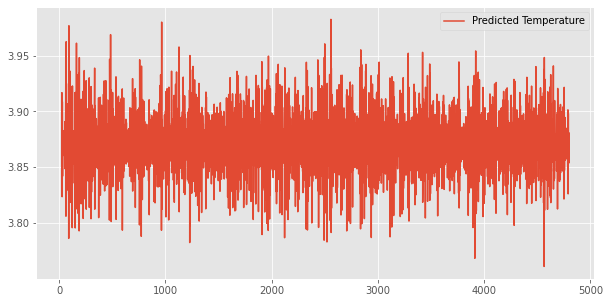

In [64]:
plt.figure(figsize=(10,5))
plt.plot(test_set.index[window_size:], y_pred[:, 0], label='Predicted Temperature')
plt.legend()
plt.show()

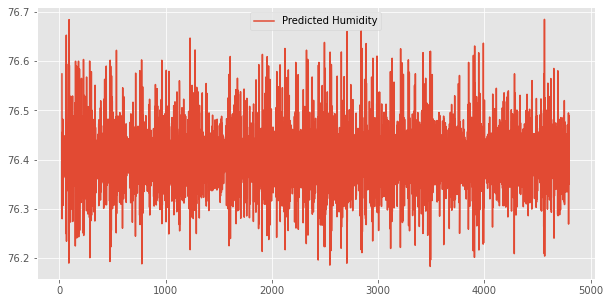

In [65]:
plt.figure(figsize=(10,5))
plt.plot(test_set.index[window_size:], y_pred[:, 1], label='Predicted Humidity')
plt.legend()
plt.show()

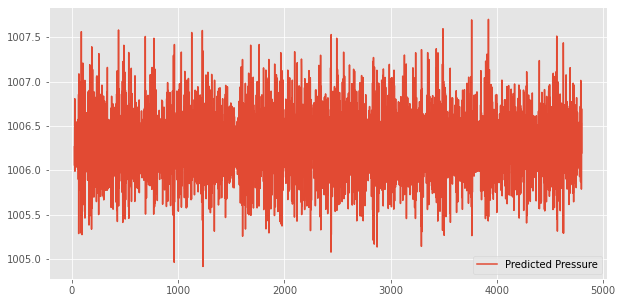

In [66]:
plt.figure(figsize=(10,5))
plt.plot(test_set.index[window_size:], y_pred[:, 2], label='Predicted Pressure')
plt.legend()
plt.show()

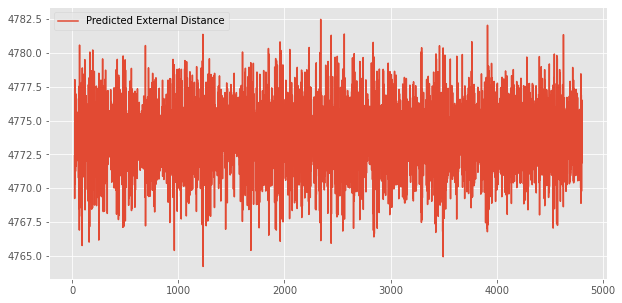

In [67]:
plt.figure(figsize=(10,5))
plt.plot(test_set.index[window_size:], y_pred[:, 3], label='Predicted External Distance')
plt.legend()
plt.show()

In [68]:
# Define the threshold value
threshold = 0.5

y_test_binary = np.zeros_like(y_test_sequences)
y_test_binary[y_test_sequences > threshold] = 1

# Convert the predicted values to binary format based on the threshold
y_pred_binary = (y_pred > threshold).astype(int)

# Compute the evaluation metrics
accuracy = accuracy_score(y_test_binary, y_pred_binary)

print('Accuracy: {:.2f}%'.format(accuracy * 100))

Accuracy: 43.76%
